In [1]:
import seaborn as sns, pandas as pd, numpy as np

In [6]:
data = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML241EN-SkillsNetwork/labs/datasets/Human_Activity_Recognition_Using_Smartphones_Data.csv", sep=',')
data.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING


In [7]:
data.dtypes.value_counts()

float64    561
object       1
Name: count, dtype: int64

In [8]:
# Check the scale of the data - range is between -1 and 1
print(f"Maximum value: {data.iloc[:, :-1].min().value_counts()}")
print(f"Minimum value: {data.iloc[:, :-1].max().value_counts()}")

Maximum value: -1.0    561
Name: count, dtype: int64
Minimum value: 1.0    561
Name: count, dtype: int64


# Let's check the distribution of the target variable
As the target variable is categorical, we'll need to encode it before we can use it in our model.

In [9]:
data.Activity.value_counts()

Activity
LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Activity'>

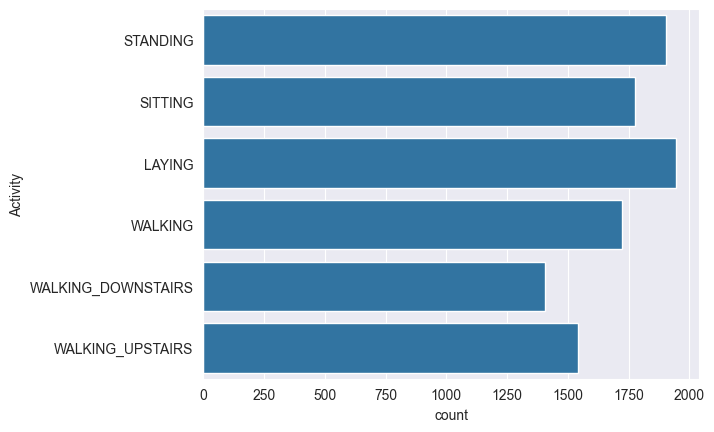

In [10]:
sns.countplot(data.Activity) # Balanced

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data['Activity'])
data.Activity.value_counts()

Activity
0    1944
2    1906
1    1777
3    1722
5    1544
4    1406
Name: count, dtype: int64

# Check the correlation between the variables

In [14]:
feature_cols = data.columns[:-1]
corr = data[feature_cols].corr()

# Remove the diagonal values
tril_index = np.tril_indices_from(corr)

#Make the unused values NaN
for coord in zip(*tril_index):
    corr.iloc[coord[0], coord[1]] = np.nan
    
# Stack the data and convert to a data frame
corr_values = (corr
               .stack()
               .to_frame()
               .reset_index()
               .rename(columns={'level_0':'feature1',
                                'level_1':'feature2',
                                0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

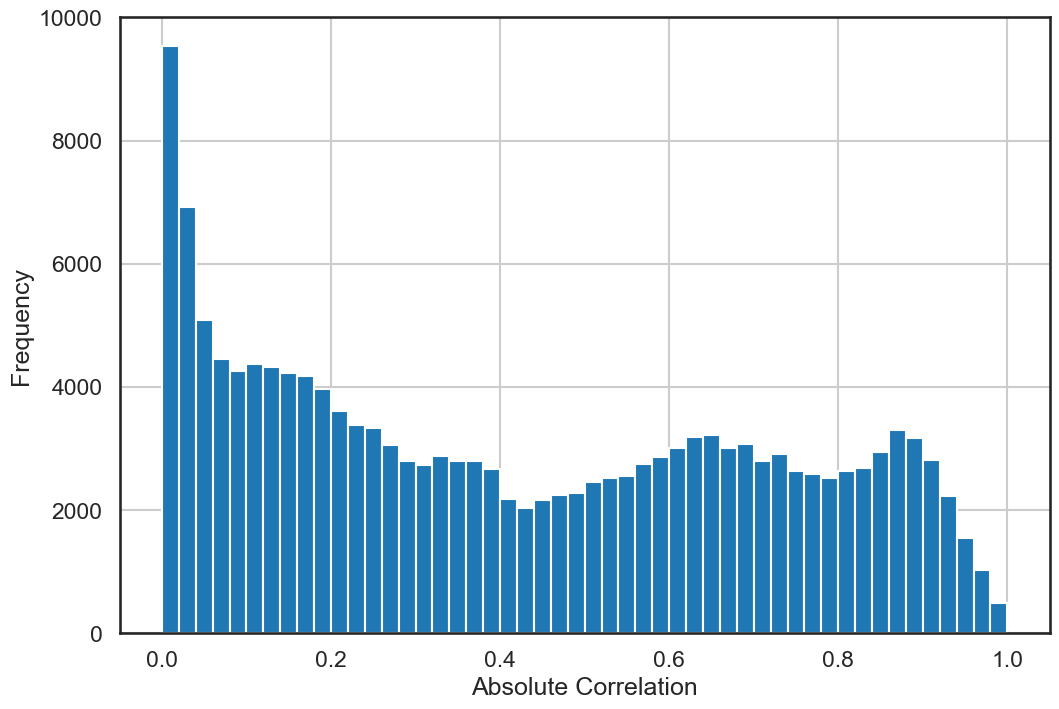

In [16]:
sns.set_context('talk')
sns.set_style('white')

ax = corr_values.abs_correlation.hist(bins=50, figsize=(12, 8))
ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

In [18]:
# Get the highest correlation values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

In [20]:
y_train.value_counts(normalize=True)

Activity
0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: proportion, dtype: float64

In [21]:
y_test.value_counts(normalize=True)

Activity
0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: proportion, dtype: float64

In [22]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [23]:
from sklearn.linear_model import LogisticRegressionCV

# L1 regularized logistic regression
lr_l1 = LogisticRegressionCV(Cs=10, cv=4, penalty='l1', solver='liblinear').fit(X_train, y_train)

In [24]:
lr_l2 = LogisticRegressionCV(Cs=10, cv=4, penalty='l2', solver='liblinear').fit(X_train, y_train)

In [25]:
# Combine all the coefficients into a dataframe
coefficients = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    coeffs = mod.coef_
    coeff_label = pd.MultiIndex(levels=[[lab], [0,1,2,3,4,5]], 
                                 codes=[[0,0,0,0,0,0], [0,1,2,3,4,5]])
    coefficients.append(pd.DataFrame(coeffs.T, columns=coeff_label))

coefficients = pd.concat(coefficients, axis=1)

coefficients.sample(10)

lr                                                          l1  \
            0         1         2         3         4         5         0   
388  0.003651  0.257541  0.345870  0.233689  0.256883  0.654745 -0.059496   
50   0.317225  1.904829 -2.562046  0.248913  0.348187 -1.277040 -0.302083   
383 -0.019481  0.173431  0.059836 -0.100348  0.306047 -0.047916  0.000660   
38   0.272909 -0.783830  0.870074  0.394167 -0.290467  0.380146  0.532979   
406 -0.006814  0.226417  0.147180  0.475511  0.164297 -0.138821  0.000000   
194  0.019414  0.580715 -0.802380 -0.578045  0.293138  1.107637  0.000000   
311 -0.021760  0.133201 -0.001018 -0.045809  0.059732 -0.192520 -0.000281   
163 -0.025256 -0.278257  0.209553  0.692665 -0.831745  0.280174 -0.005979   
460 -0.009836  0.345827  0.071641  0.119368  0.337041 -0.160197  0.017461   
403 -0.027296  0.057664 -0.029316  0.078509  0.115030 -0.264176 -0.072478   

                                                              l2            \
             1         2         3         4         5         0         1   
388   0.834423  0.819867  0.111281  0.003394  0.522380 -0.015866  0.709248   
50   16.229679  0.000000  0.000000  0.000000 -4.695021  0.394311  3.455135   
383   0.334063  0.000000  0.000000  0.584343 -0.188140 -0.054421  0.583117   
38   -2.165867  1.434254  0.000000 -0.587925  1.032899  0.640742 -1.712710   
406   0.804434  0.000000  0.364121  0.087442 -0.006827 -0.031767  0.842958   
194  -1.577417 -1.542751 -1.035328  0.872567  5.510283  0.094395 -0.123555   
311   0.015483  0.000000  0.000000  0.175155 -0.316157 -0.056735  0.435845   
163  -0.588275  0.000000  0.891170 -1.688708  0.846050 -0.045248 -1.215915   
460   1.256429  0.000000  0.000000  0.056174 -0.081764 -0.032532  1.298251   
403   0.000000  0.000000  0.000000  0.030500 -0.392611 -0.064217 -0.142904   

                                             
            2         3         4         5  
388  0.486326  0.544534  0.490349  2.802410  
50  -3.186459  1.048481  0.837840 -4.815551  
383  0.080056 -0.192023  0.790974 -0.313051  
38   1.173828  0.807169 -0.800127  1.442005  
406  0.167478  1.510428  0.372583 -0.796298  
194 -1.166758 -1.739817  0.715532  4.791422  
311 -0.008924  0.089136  0.203748 -0.800401  
163  0.355064  1.890178 -1.670566  0.964922  
460  0.061513  0.415833  0.531357 -0.856780  
403 -0.031473 -0.017416  0.334059 -0.551319

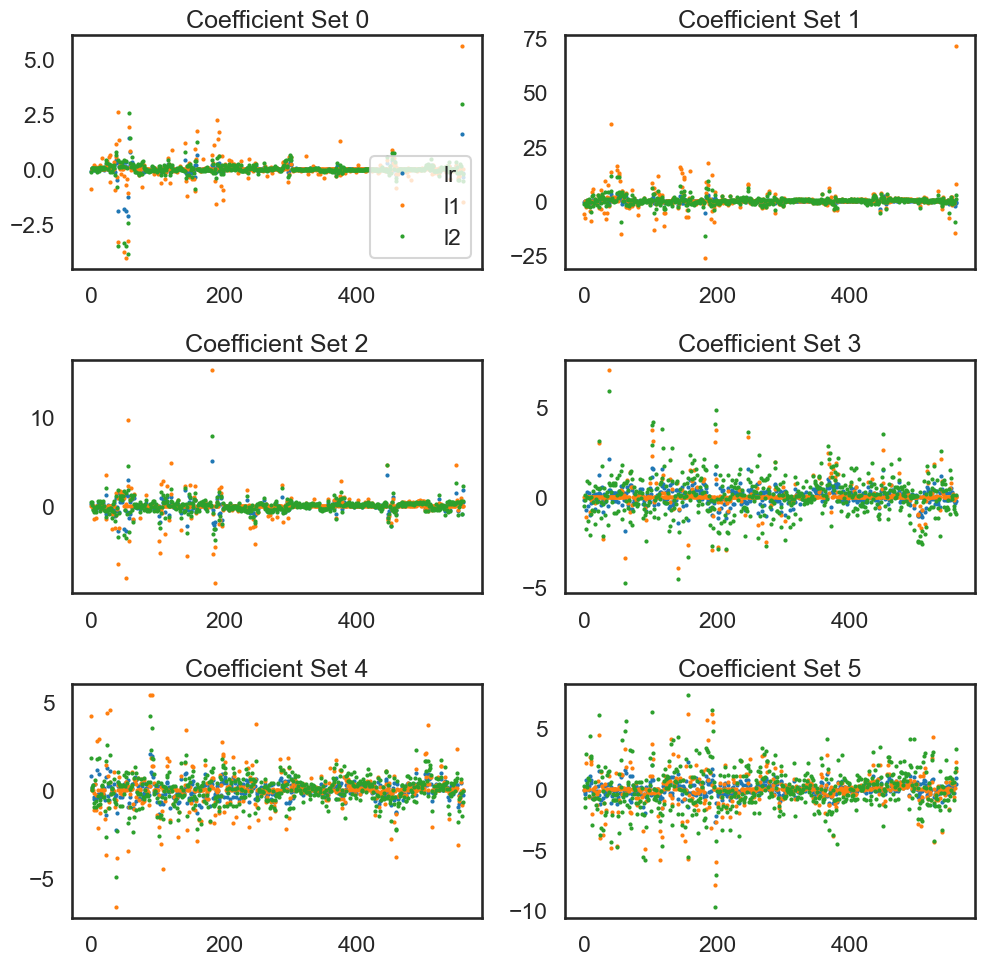

In [26]:
fig, axList = plt.subplots(nrows=3, ncols=2)
axList = axList.flatten()
fig.set_size_inches(10,10)

for ax in enumerate(axList):
    loc = ax[0]
    ax = ax[1]
    
    data = coefficients.xs(loc, level=1, axis=1)
    data.plot(marker='o', ls='', ms=2.0, ax=ax, legend=False)
    
    if ax is axList[0]:
        ax.legend(loc=4)
        
    ax.set(title='Coefficient Set '+str(loc))

plt.tight_layout()

In [27]:
# Predict the class and the probability for each
y_pred = list()
y_prob = list()

coeff_labels = ['lr', 'l1', 'l2']
coeff_models = [lr, lr_l1, lr_l2]

for lab,mod in zip(coeff_labels, coeff_models):
    y_pred.append(pd.Series(mod.predict(X_test), name=lab))
    y_prob.append(pd.Series(mod.predict_proba(X_test).max(axis=1), name=lab))
    
y_pred = pd.concat(y_pred, axis=1)
y_prob = pd.concat(y_prob, axis=1)

y_pred.head()

,lr,l1,l2
0,3,3,3
1,5,5,5
2,3,3,3
3,1,1,1
4,0,0,0


In [28]:
y_prob.head()

,lr,l1,l2
0,0.998939,0.998981,0.999758
1,0.988165,0.999492,0.999477
2,0.987592,0.999193,0.999697
3,0.981381,0.999182,0.994338
4,0.998277,1.000000,0.999997


In [29]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score
from sklearn.preprocessing import label_binarize

metrics = list()
cm = dict()

for lab in coeff_labels:

    # Preciision, recall, f-score from the multi-class support function
    precision, recall, fscore, _ = score(y_test, y_pred[lab], average='weighted')
    
    # The usual way to calculate accuracy
    accuracy = accuracy_score(y_test, y_pred[lab])
    
    # ROC-AUC scores can be calculated by binarizing the data
    auc = roc_auc_score(label_binarize(y_test, classes=[0,1,2,3,4,5]),
              label_binarize(y_pred[lab], classes=[0,1,2,3,4,5]), 
              average='weighted')
    
    # Last, the confusion matrix
    cm[lab] = confusion_matrix(y_test, y_pred[lab])
    
    metrics.append(pd.Series({'precision':precision, 'recall':recall, 
                              'fscore':fscore, 'accuracy':accuracy,
                              'auc':auc}, 
                             name=lab))

metrics = pd.concat(metrics, axis=1)

In [30]:
metrics

,lr,l1,l2
precision,0.984144,0.982529,0.983824
recall,0.984142,0.982524,0.983819
fscore,0.984143,0.982524,0.983819
accuracy,0.984142,0.982524,0.983819
auc,0.990384,0.989366,0.990165


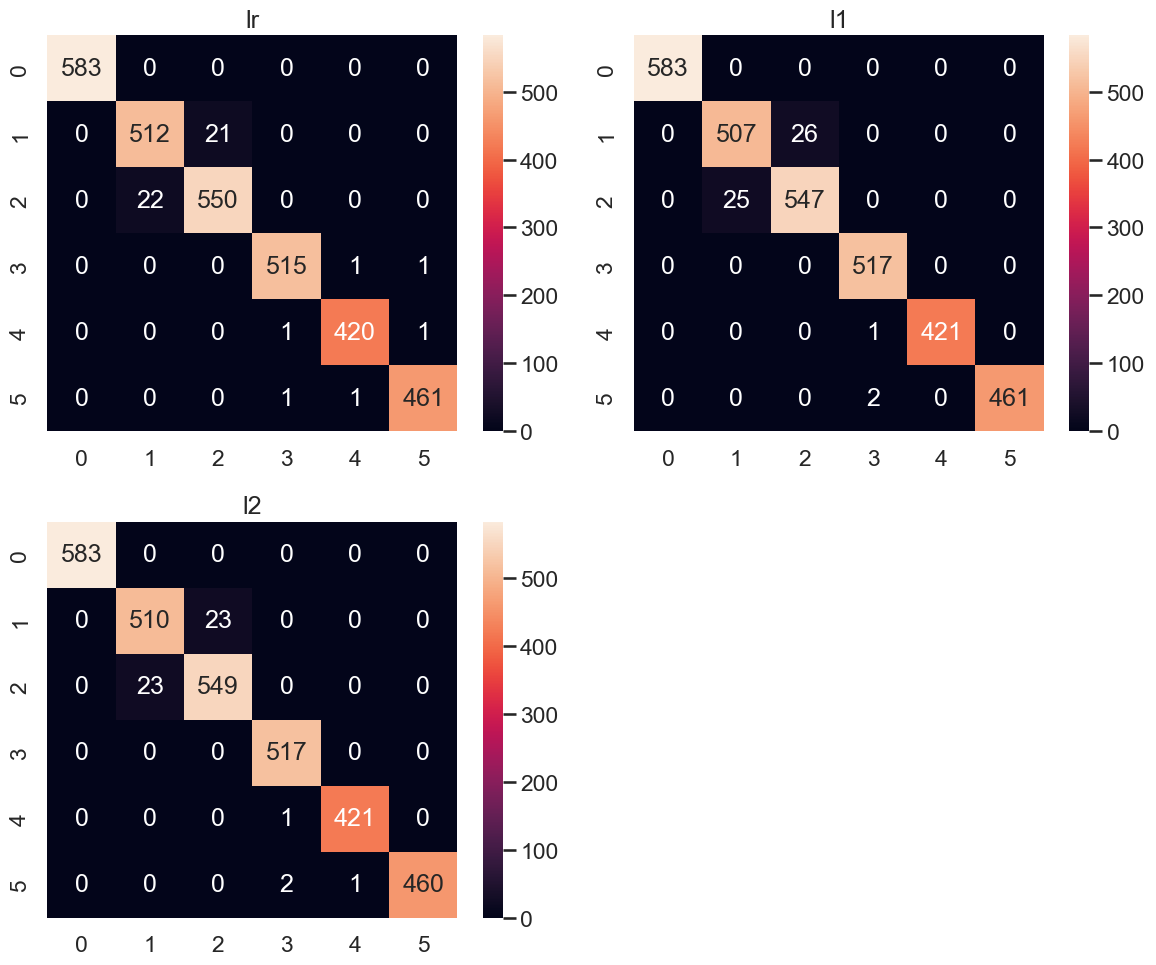

In [31]:
fig, axList = plt.subplots(nrows=2, ncols=2)
axList = axList.flatten()
fig.set_size_inches(12, 10)

axList[-1].axis('off')

for ax,lab in zip(axList[:-1], coeff_labels):
    sns.heatmap(cm[lab], ax=ax, annot=True, fmt='d');
    ax.set(title=lab);
    
plt.tight_layout()